<h1>Case - Bank Marketing</h1>
<p>Fonte oficial dos dados:<br><a href="https://archive.ics.uci.edu/ml/datasets/bank+marketing" target="_blank">UCI Machine Learning Repository: Bank Marketing Data Set</a></p>

In [1]:
#Carregando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Carregando o dataset
df = pd.read_csv('bank-full.csv', sep=';')

In [3]:
#Informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


---

<h2>Questões</h2>

<h3>1. Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?</h3>

In [5]:
df1 = df[['job', 'loan']]

In [6]:
df1_grouped = df1[(df1.loan == 'yes')].groupby(['job']).count().reset_index().sort_values('loan', ascending=True)
df1_grouped

,job,loan
11,unknown,4
8,student,12
10,unemployed,109
3,housemaid,152
6,self-employed,229
5,retired,309
2,entrepreneur,356
7,services,836
0,admin.,991
4,management,1253


In [7]:
df1_2 = df[['job', 'housing']]

In [8]:
df1_2_grouped = df1_2[(df1_2.housing == 'yes')].groupby(['job']).count().reset_index().sort_values('housing', ascending=True)
df1_2_grouped

,job,housing
11,unknown,26
8,student,249
3,housemaid,398
5,retired,491
10,unemployed,543
6,self-employed,765
2,entrepreneur,869
7,services,2766
0,admin.,3182
9,technician,4115


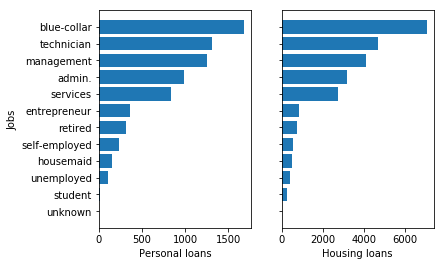

In [9]:
#Questão 1 - Gráfico
fig, ax = plt.subplots(1,2, sharey=True)
jobs = df1_grouped['job'].values
loans = df1_grouped['loan'].values
housings = df1_2_grouped['housing'].values
ax[0].barh(jobs, loans)
ax[1].barh(jobs, housings)
ax[0].set_xlabel("Personal loans")
ax[1].set_xlabel("Housing loans")
ax[0].set_ylabel("Jobs")
plt.show()

<h4>Q1) Resposta:</h4>
<ul>
    <li>A profissão que tem mais tendência a fazer empréstimos é a de trabalhadores "blue-collar".</li>
    <li>O tipo de empréstimo mais realizado é o "empréstimo imobiliário" (housing loan)</li>
</ul>

---

<h3>2. Fazendo uma relação entre número de contatos e sucesso da campanha quais são os pontos relevantes a serem observados?</h3>

In [10]:
#Descrição da coluna de número de contatos realizados durante a campanha
df['campaign'].describe(include='all')

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

In [11]:
#Descrição da coluna de resultados da campanha
df['poutcome'].describe(include='all')

count       45211
unique          4
top       unknown
freq        36959
Name: poutcome, dtype: object

In [12]:
#Valores distintos da coluna 'poutcome'
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [13]:
df['campaign'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

In [14]:
df2 = df.copy()

In [15]:
#Total de contatos realizados e seus resultados
df2[['campaign', 'poutcome']].groupby(['poutcome']).count().reset_index()

,poutcome,campaign
0,failure,4901
1,other,1840
2,success,1511
3,unknown,36959


In [16]:
#Resultados e respectivas quantidades de contatos realizados
df2 = df2.groupby('poutcome')['campaign'].value_counts().unstack().fillna(0)
df2

campaign,1,2,3,4,5,6,7,8,9,10,...,39,41,43,44,46,50,51,55,58,63
poutcome,,,,,,,,,,,,,,,,,,,,,
failure,2458.0,1374.0,500.0,242.0,140.0,87.0,52.0,22.0,10.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
other,718.0,500.0,262.0,131.0,86.0,55.0,34.0,24.0,13.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
success,837.0,402.0,149.0,51.0,30.0,21.0,11.0,8.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
unknown,13531.0,10229.0,4610.0,3098.0,1508.0,1128.0,638.0,486.0,303.0,256.0,...,1.0,2.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0


In [17]:
cp = df2.columns.values

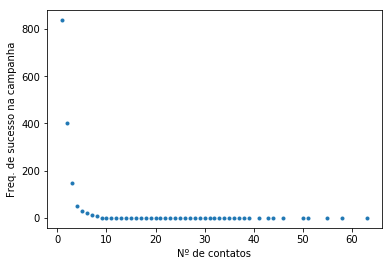

<Figure size 1296x1296 with 0 Axes>

In [18]:
#Questão 2 - Gráfico 1
fig, ax = plt.subplots()
fig = plt.figure(figsize=(18, 18))
ax.scatter(cp, df2.loc['success'], marker='.')

ax.set_xlabel("Nº de contatos")
ax.set_ylabel("Freq. de sucesso na campanha")

plt.show()

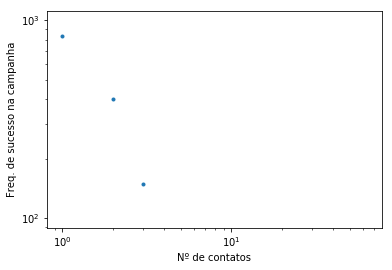

<Figure size 1296x1296 with 0 Axes>

In [19]:
#Questão 2 - Gráfico 2 (escala logarítmica)
fig, ax = plt.subplots()
fig = plt.figure(figsize=(18, 18))
ax.scatter(cp, df2.loc['success'], marker='.')

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlabel("Nº de contatos")
ax.set_ylabel("Freq. de sucesso na campanha")

plt.show()

<h4>Q2) Resposta:</h4>
<ul>
    <li>Aparentemente o número de contatos é inversamente proporcional ao sucesso na campanha. À partir de aproximadamente 10 contatos, os resultados começam a tender a 0.</li>
</ul>

---

<h3>3. Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?</h3>

In [20]:
df3 = df2.copy()

In [21]:
df3_1 = df2.loc[['success']].unstack()
df3_1 = df3_1[(df3_1.values > 0)]
df3_1 = pd.DataFrame(df3_1)

In [22]:
df3_1 = df3_1.reset_index().drop(columns='poutcome').set_index('campaign')

In [23]:
df3_1.rename(columns={0: "Frequencia"}, inplace=True)

In [24]:
df3_1

,Frequencia
campaign,
1,837.0
2,402.0
3,149.0
4,51.0
5,30.0
6,21.0
7,11.0
8,8.0
9,1.0


In [25]:
#Média da frequência de sucessos nas ligações
df3_1['Frequencia'].mean()

151.1

<h4>Q3) Resposta:</h4>
<ul>
    <li>O número médio indicado é de 3 ligações, visto que a média é de 151 e a frequência para 3 ligações se encontra muito próxima desse valor. Se fossem feitas 4 ligações a frequência de sucesso poderia diminuir</li>
    <li>O número máximo de ligações para otimizar a adesão é 3, visto que depois desse ponto os resultados caem em aproximadamente 1/3 (149 para 51). Porém, o máximo de ligações que geram resultado é de 11.</li>
</ul>

<h3>4. O resultado da campanha anterior tem relevância na campanha atual?</h3>

---

<h3>5. Qual o fator determinante para que o banco exija um seguro de crédito?</h3>

---

<h3>6. Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário?</h3>

---